In [ ]:
%pip install statsmodels seaborn scipy matplotlib pandas numpy scikit-learn patsy pyarrow openpyxl requests sqlalchemy

/bin/bash: /usr/local/bin/pip: /usr/local/opt/python/bin/python3.7: bad interpreter: No such file or directory


In [ ]:
%git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 553 (delta 23), reused 3 (delta 3), pack-reused 525 (from 1)
Receiving objects: 100% (553/553), 63.76 MiB | 1.19 MiB/s, done.
Resolving deltas: 100% (209/209), done.
Updating files: 100% (208/208), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [2]:
import itertools

def first_letter(x):
    return x[0]

names = ['Alice', 'Adam' 'Bob', 'Charlie', 'David', 'Eve']

for letter, names in itertools.groupby(sorted(names, key=first_letter), key=first_letter):
    print(letter, list(names))

A ['Alice', 'AdamBob']
C ['Charlie']
D ['David']
E ['Eve']


# Numpy 

In [3]:
# Numpy faster mathematical opertions than python lists

# easiest way to create a numpy array is to use the np.array function
data = np.array([[1.5, 2.5, 3.5, 4.5], [0, 1, 2, 3]])
print(data)

data = data * 10 
print(data)

# each array has shape and dtype attributes
print("deminsions of the array", data.ndim)
print("shape of numpy array", data.shape)
print("data type of the array",data.dtype)

#easy to create a numpy array with zeros
data = np.zeros((2, 3))
print(data)
# or with ones
data = np.ones((2, 3))
print(data)

#array-valued operations
print("using arange function:",np.arange(10))  # creates an array with values from 0 to 9
print(np.arange(0, 10, 2))  # creates an array with values from 0 to 8 with a step of 2

arr = np.array([1,2,3,4,5])
print(arr.dtype)
float_arr = arr.astype(np.float64)  # convert to float
print(float_arr.dtype)


[[1.5 2.5 3.5 4.5]
 [0.  1.  2.  3. ]]
[[15. 25. 35. 45.]
 [ 0. 10. 20. 30.]]
deminsions of the array 2
shape of numpy array (2, 4)
data type of the array float64
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
using arange function: [0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
int64
float64


#### Python Basics

**Book** - Python for Data Analysis (Ch. 1–2)

  Company  Price  Shares
0    GOOG   1000      10
1   GOOGL   2000      20
2    MSFT   3000      30
3    AMZN   4000      40
  Company  Price  Shares
0    GOOG   1000      10
1   GOOGL   2000      20
2    MSFT   3000      30
3    AMZN   4000      40
             Price     Shares
count     4.000000   4.000000
mean   2500.000000  25.000000
std    1290.994449  12.909944
min    1000.000000  10.000000
25%    1750.000000  17.500000
50%    2500.000000  25.000000
75%    3250.000000  32.500000
max    4000.000000  40.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  4 non-null      object
 1   Price    4 non-null      int64 
 2   Shares   4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes
None


<Axes: xlabel='Company'>

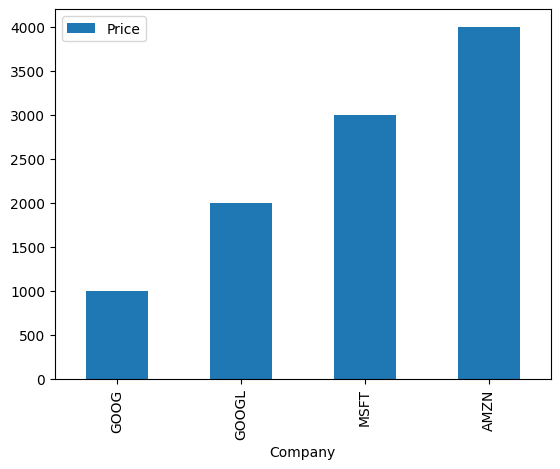

In [10]:
# Python Basics 
data = {
    "Company" : ["GOOG", "GOOGL", "MSFT", "AMZN"],
    "Price" : [1000, 2000, 3000, 4000],
    "Shares" : [10, 20, 30, 40],
}

df = pd.DataFrame(data)
print(df)
print(df.head())
print(df.describe())
print(df.info())
df.plot(kind='bar', x='Company', y='Price')

/var/folders/kr/gft6qzsx1pd7p6nqyq9g3wd00000gn/T/ipykernel_33333/2934676266.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538506  72.598884  71.292296  71.545882  135480400
2020-01-03  71.833290  72.594055  71.608685  71.765667  146322800
2020-01-06  72.405701  72.444344  70.703034  70.954210  118387200
2020-01-07  72.065155  72.671348  71.845377  72.415345  108872000
2020-01-08  73.224411  73.526303  71.768086  71.768086  132079200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   253 non-null    float64
 1   (High, AAPL)    253 non-null    float64
 2   (Low, AAPL)     253 non-null    float64
 3   (Open, AAPL)    253 non-null    float64
 4   (Volume, AAPL)  253 non-null    int64  
dtypes: float64(4), int64(1)
memor

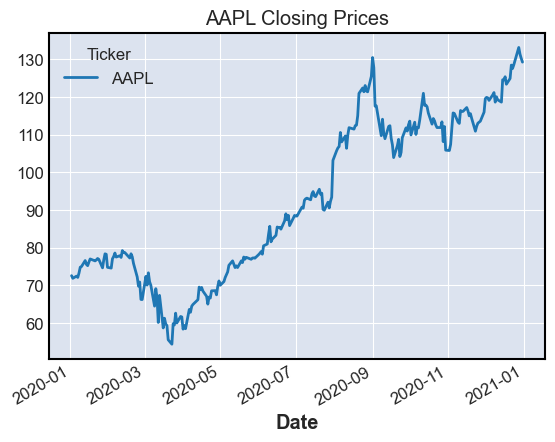

In [39]:
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
print(data.head())
print(data.info())
print("Null values in the data:", data.isnull().sum())
data["Close"].plot(title="AAPL Closing Prices")
plt.show()

# Open, High, Low, Close, Volume - stock market data columns are called OHLCV

mplfinance - matplotlib utilities for the visualization, and visual analysis, of financial data [link](https://github.com/matplotlib/mplfinance)

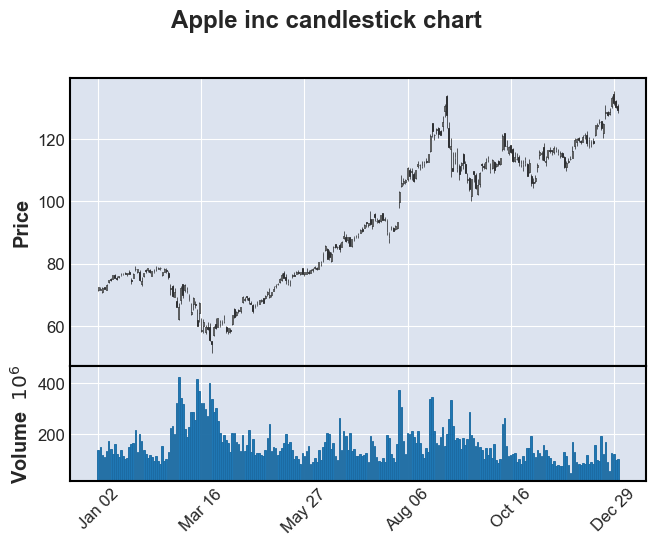

In [40]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import mplfinance as mpf

# Flatten MultiIndex columns and rename to standard OHLCV
stock = data.copy()
stock.columns = [col[0] for col in stock.columns]
stock = stock.rename(columns={
    'Close': 'Close',
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Volume': 'Volume'
})

# Ensure OHLCV columns are numeric
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    stock[col] = pd.to_numeric(stock[col], errors='coerce')

# Drop rows with NaN values in OHLCV columns
stock = stock.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'])

mpf.plot(stock , type='candle', volume = True, title = "Apple inc candlestick chart")

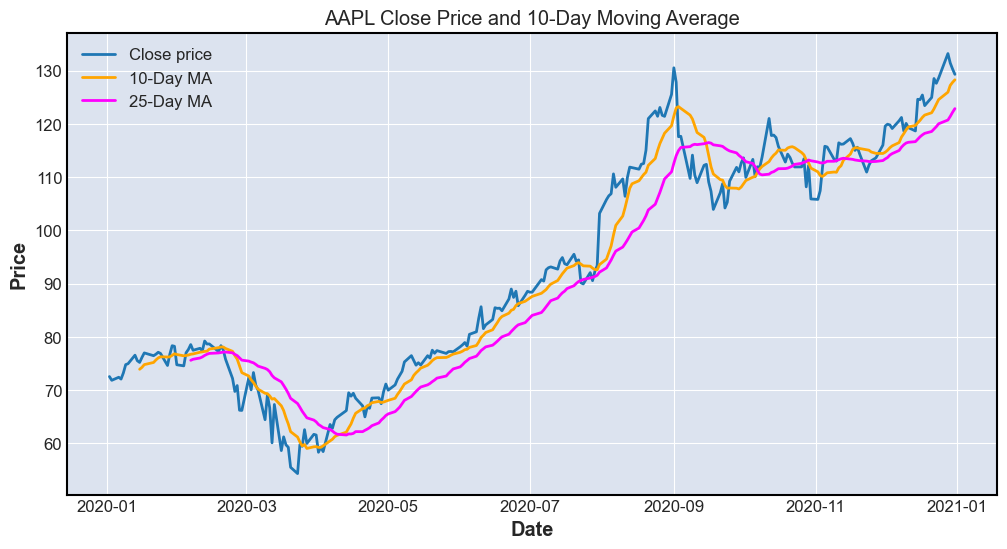

In [44]:
# Moving Average over a period of 10 days, this is a simple technical indicator - helps smooth out price data by creating a constantly updated average price.
stock['MA10'] = stock['Close'].rolling(window=10).mean()
stock['MA25'] = stock['Close'].rolling(window=25).mean()

# Plotting the closing prices along witht the moving average lets us see a trend more clearly.
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], label='Close price')
plt.plot(stock['MA10'], label='10-Day MA', color='orange')
plt.plot(stock['MA25'], label='25-Day MA', color='magenta')
plt.title('AAPL Close Price and 10-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

### Reflection 

1) What suprised me about the data is how fast it changes at each point